In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("/content/churn.csv")
df.head(12)

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [26]:
duplecates = df.duplicated().sum()
print("Кол-во дупликатов: ",duplecates)


Кол-во дупликатов:  0


In [27]:
df_setect_out=df[['Customer_Age','Credit_Limit','Dependent_count','Months_on_book','Total_Relationship_Count']]
df_setect_out

,Customer_Age,Credit_Limit,Dependent_count,Months_on_book,Total_Relationship_Count
0,45,12691.0,3,39,5
1,49,8256.0,5,44,6
2,51,3418.0,3,36,4
3,40,3313.0,4,34,3
4,40,4716.0,3,21,5
...,...,...,...,...,...
10122,50,4003.0,2,40,3
10123,41,4277.0,2,25,4
10124,44,5409.0,1,36,5
10125,30,5281.0,2,36,4


In [7]:
outlier_cols = []

for column in df_setect_out.columns:
    Q1 = df_setect_out[column].quantile(0.25)
    Q3 = df_setect_out[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (df_setect_out[column] < Q1 - 1.5 * IQR) | (df_setect_out[column] > Q3 + 1.5 * IQR)

    if any(outliers):
        outlier_cols.append(column)

print("Columns with outliers:", outlier_cols)

Columns with outliers: ['Customer_Age', 'Credit_Limit', 'Months_on_book']


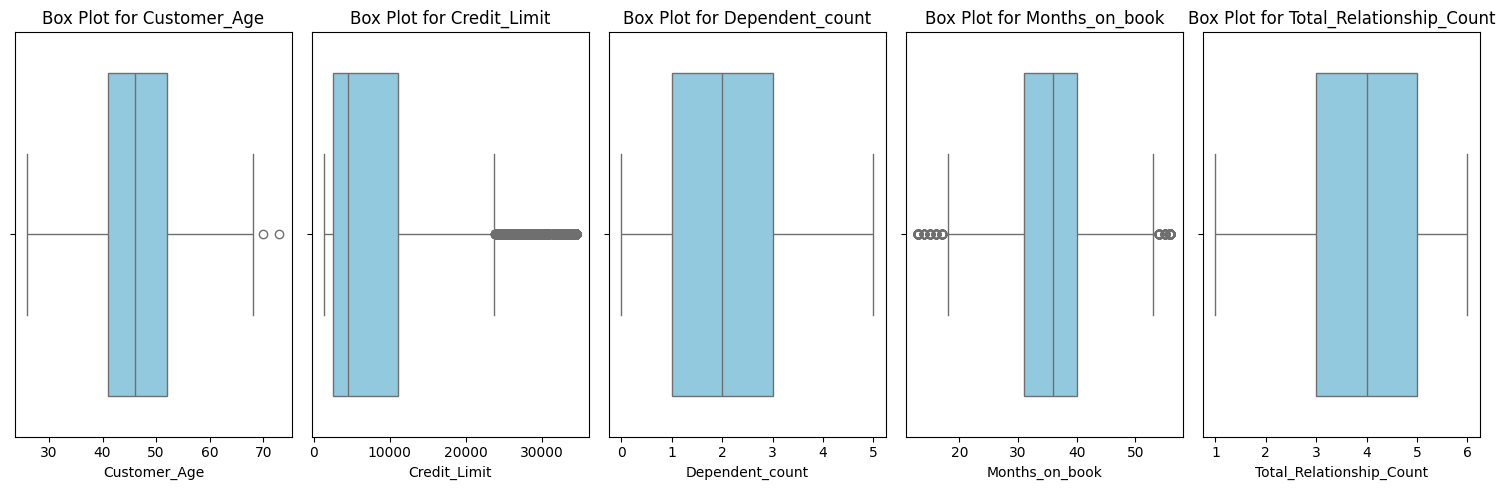

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=len(df_setect_out.columns), figsize=(15, 5))

for i, column in enumerate(df_setect_out.columns):
    sns.boxplot(x=df_setect_out[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [10]:
data = {
    'Customer_Age': [26, 30, 40, 50, 60, 68, 73],
    'Credit_Limit': [1700, 2000,  5000, 10000,  15000, 20000, 39000 ],
    'Month_on_book': [13, 25, 30, 40, 45, 50, 56],
}

df_select_out = pd.DataFrame(data)

def replace_outliers(column, replace_value):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    column.loc[(column < lower_bound) | (column > upper_bound)] = replace_value

for col in ['Customer_Age', 'Credit_Limit', 'Month_on_book']:
    replace_outliers(df_select_out[col], replace_value=df_select_out[col].median())


In [11]:
average_age = df.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()
average_age

,Customer_Age,Credit_Limit
0,26,4591.953846
1,27,5532.996875
2,28,8910.103448
3,29,7457.260714
4,30,6466.075714
5,31,8477.200000
6,32,8170.900943
7,33,7455.800000
8,34,7364.219863
9,35,7132.426630


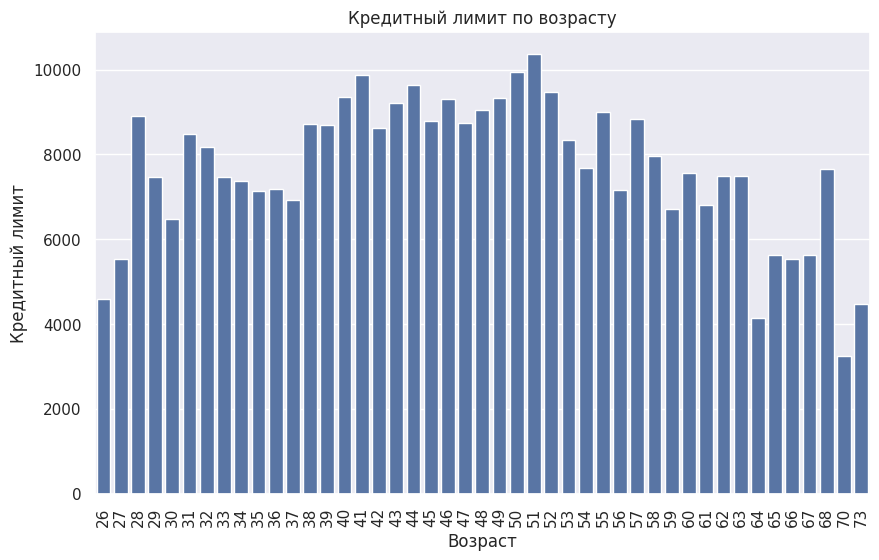

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_Age', y='Credit_Limit', data=average_age)
plt.title('Кредитный лимит по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Кредитный лимит')
plt.xticks(rotation=90)

plt.show()

In [13]:
min_age = average_age.loc[average_age['Credit_Limit'].idxmin(), 'Customer_Age']
max_age = average_age.loc[average_age['Credit_Limit'].idxmax(), 'Customer_Age']

min_credit = average_age['Credit_Limit'].min()
max_credit = average_age['Credit_Limit'].max()

print(f'Минимальный кредитный лимит: {min_credit} в возрасте: {min_age}')
print(f'Максимальный кредитный лимит: {max_credit} в возрасте: {max_age}')

Минимальный кредитный лимит: 3252.0 в возрасте: 70
Максимальный кредитный лимит: 10371.480904522612 в возрасте: 51


In [14]:
edu_counts = df['Education_Level'].value_counts().reset_index()

edu_counts.columns = ['Education_Level', 'Count']
print(edu_counts)

  Education_Level  Count
0        Graduate   3128
1     High School   2013
2         Unknown   1519
3      Uneducated   1487
4         College   1013
5   Post-Graduate    516
6       Doctorate    451


<ipython-input-16-aa95937a5b4a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x ='Count', y='Education_Level', data=edu_counts, palette='copper')


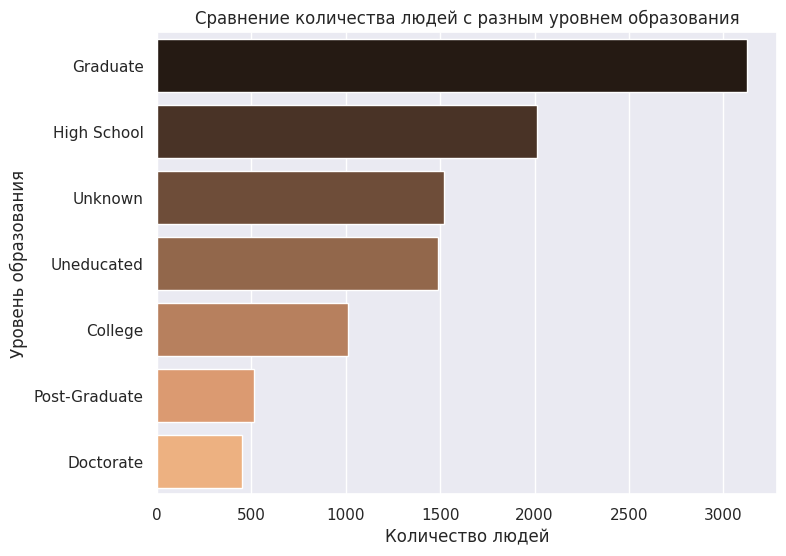

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x ='Count', y='Education_Level', data=edu_counts, palette='copper')
plt.xlabel("Количество людей")
plt.ylabel("Уровень образования")
plt.title("Сравнение количества людей с разным уровнем образования")

plt.show()

In [17]:
corr = df['Customer_Age'].corr(df['Months_on_book'])
print("Кореляция между возрастом пользователя и периодом его взаимоотношений в банке: {:.3f}".format(corr))

Кореляция между возрастом пользователя и периодом его взаимоотношений в банке: 0.789


<ipython-input-18-91ab84392a6f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Customer_Age'], y=df['Months_on_book'], palette = 'twilight')


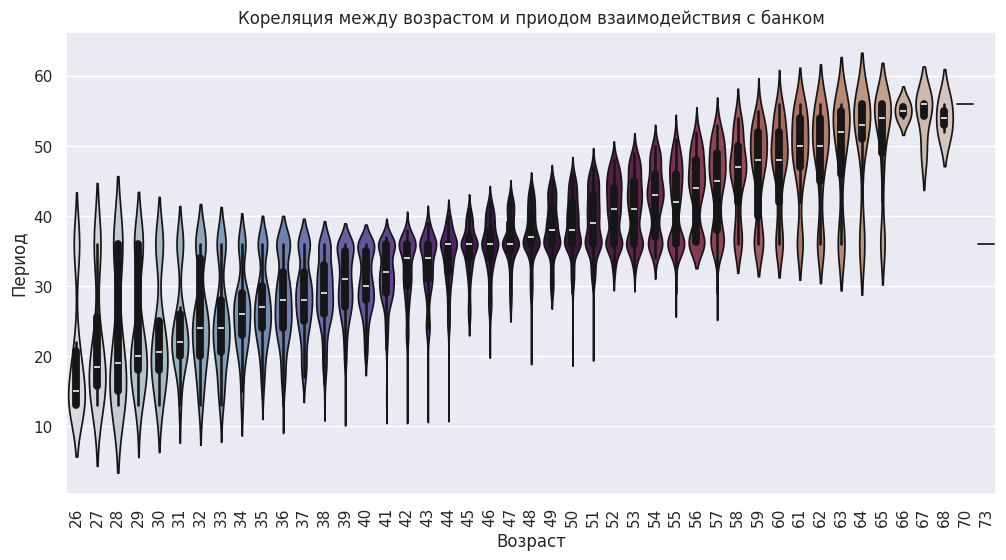

In [18]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df['Customer_Age'], y=df['Months_on_book'], palette = 'twilight')
plt.title('Кореляция между возрастом и приодом взаимодействия с банком')
plt.ylabel('Период')
plt.xlabel('Возраст')
plt.xticks(rotation=90)

plt.show()

In [19]:
marital_count = df['Marital_Status'].value_counts()
marital_count

,count
Marital_Status,
Married,4687
Single,3943
Unknown,749
Divorced,748


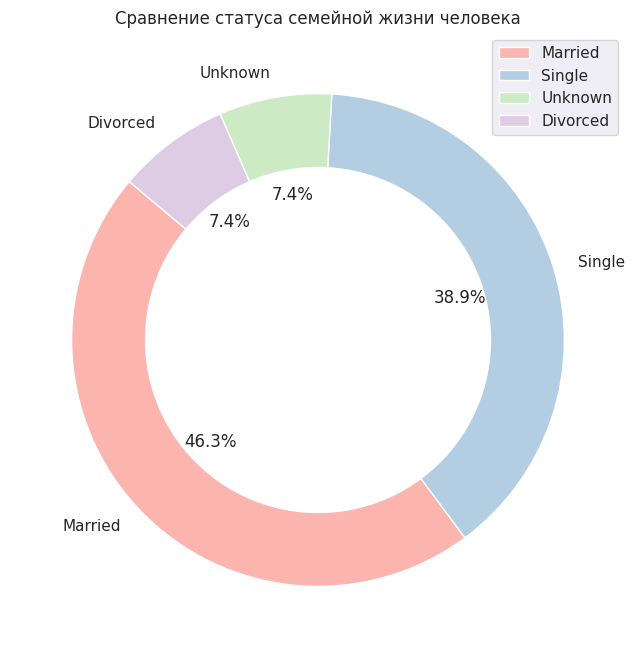

In [20]:
plt.figure(figsize =(8,8))
plt.pie(marital_count, labels=marital_count.index, autopct = '%1.1f%%', startangle=140, colors = plt.cm.Pastel1.colors)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend()
plt.title('Сравнение статуса семейной жизни человека')
plt.show()

In [21]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[categorical_columns])
df[categorical_columns] = encoded_data.astype(int)
df

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


<Axes: >

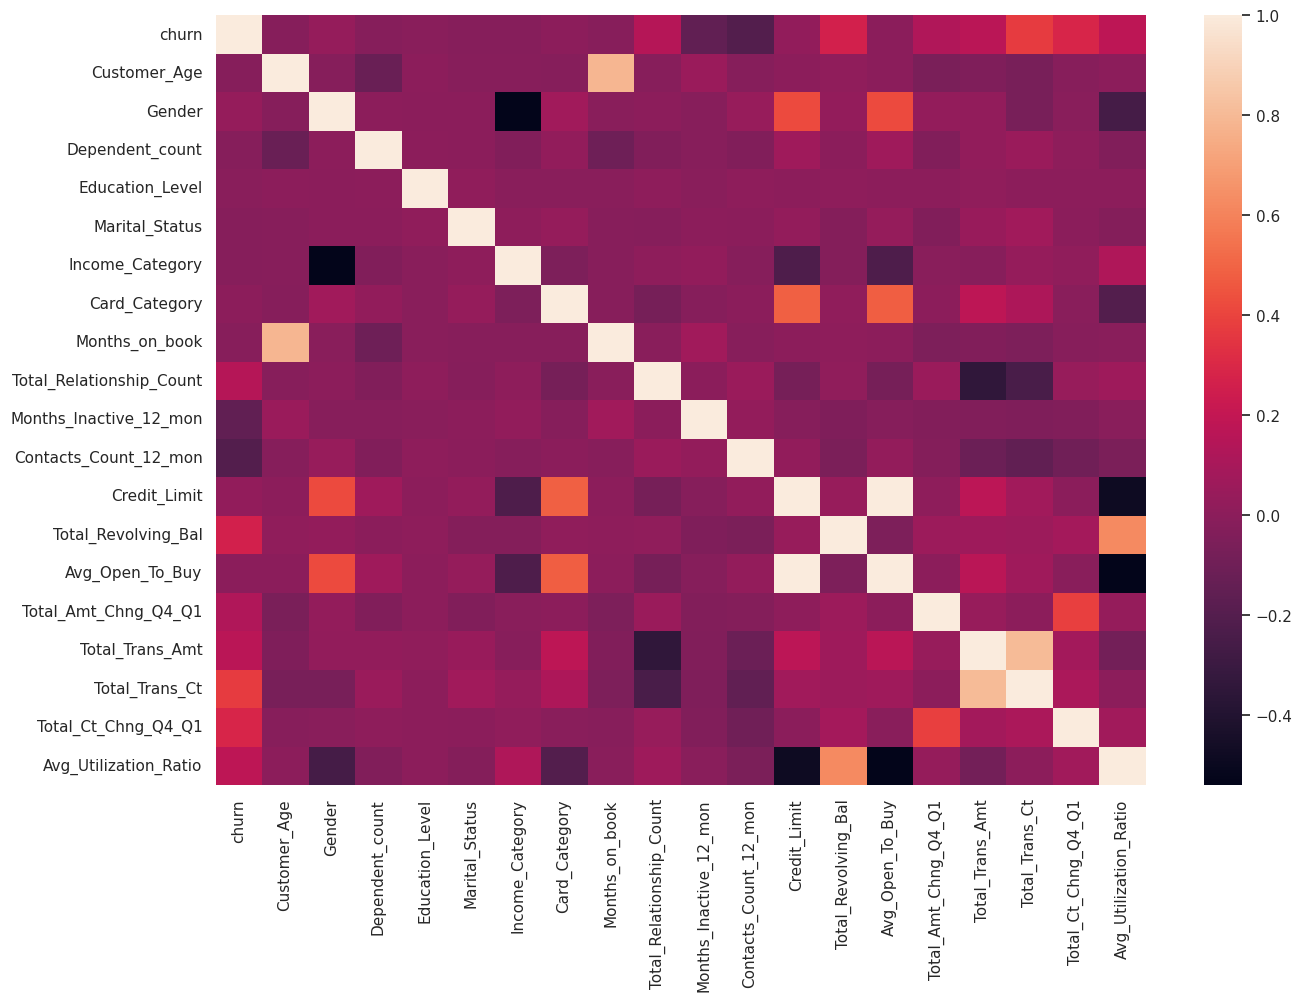

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr())